# Wine Quality Analysis 
Major Project

# <b><div style='text-align:center'><span style='color:#DEB078; font-size: 24px; font-weight: bold;'>Team Members:</span></div></b>

<div style='text-align:center'>
    <ol style='list-style-type: decimal;'>
        <li><span style='color:#DEB078; font-size: 18px;'>Ahmed Shmels Muhe, 7418521687</span></li>
        <li><span style='color:#DEB078; font-size: 18px;'>Sayani Chakraborty, 8759422550</span></li>
        <li><span style='color:#DEB078; font-size: 18px;'>Sumant Vidyarthi, 7352045294</span></li>
        <li><span style='color:#DEB078; font-size: 18px;'>Utkarsh Singh, 8756280277</span></li>
        <li><span style='color:#DEB078; font-size: 18px;'>Sakshi Hegde, 7710082455</span></li>
    </ol>
</div>

## Objective:
To study the features affecting the quality of wine as well as to detect the quality of wine.
    

<h3>Table of Contents</h3>
<ul>
    <li><a href="#ref1"> Importing the Red-Wine Dataset in csv format (Data Collection)</a></li>
    <li><a href="#ref2"> Data Wrangling </a></li>
    <li><a href="#ref3"> Data Visualization</a></li>
    <li><a href="#ref4"> Data Preprocessing</a></li>
    <li><a href="#ref3"> Label Binarization</a></li>
    <li><a href="#ref5"> Model Training</a></li>
    <li><a href="#ref3"> Model Evaluation</a></li>
    <li><a href="#ref3"> Building a Predictive System</a></li>
    <li><a href="#ref5"> Conclusion</a></li>
</ul>

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data Collection

In [127]:
wine = pd.read_csv("C:/Users/HP/Downloads/1788410-1767134-1729261-1613779-Red_wine__(1).csv")

### Data Wrangling

In [128]:
#To view the five rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [129]:
#To view the last five rows of the dataset
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [130]:
#To check the number of rows & columns 
wine.shape

(1599, 12)

In [131]:
#To check the information related to the given data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [132]:
#To check the all the features in the dataset
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [133]:
wine.index

RangeIndex(start=0, stop=1599, step=1)

In [134]:
#To view the statistical information of the Dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [135]:
#To check whether if there is null value by using isnull() function
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

By using isnull() function we got to know that there are three null values in the dataset. In order to know the rows containing the same null values, let's use the isnull() function on the respective feature columns.

In [136]:
#To check the same null values through rows
null_in_columns = wine[wine['total sulfur dioxide'].isnull()]
null_in_columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [137]:
null_in_columns1 = wine[wine['pH'].isnull()]
null_in_columns1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [138]:
null_in_columns2 = wine[wine['quality'].isnull()]
null_in_columns2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [139]:
#To find out all the null or NaN values through rows
null_rows = wine[wine.isnull().any(axis = 1)]
null_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


To discard NaN or null values in the dataset, drop function can be used if NaN values are less compared to the dataset. Also, NaN values can be filled using Mode, Median and Mean functions on respective columns.

 <li><a href="#ref1"> Mean: </a> When dataset is in a normal distibution, mean function can be used to fill in the missing values. </li> <br/>
    <li><a href="#ref2"> Median: </a> When dataset is not in a normal distribution, median function can be used to fill in the missing values. </li> <br/>
    <li><a href="#ref3"> Mode: </a> When missing values in data are categorical and discrete, mode function can be used to fill in the missing values. 
  

In [140]:
#Using mean function on column total sulphur dioxide
mean_tsf = wine['total sulfur dioxide'].mean()
mean_tsf

46.433041301627036

In [141]:
#Using mean function on column pH
mean_ph =  wine['pH'].mean()
mean_ph

3.4985857321652074

In [142]:
#Replacing NaN with mean value
wine['total sulfur dioxide'].fillna(mean_tsf, inplace = True)

Since column quality in the dataset contains discrete values. Therefore, mode function is used.

In [143]:
#Using mode function on column quality
mode_q = wine['quality'].mode()
mode_q

0    5.0
Name: quality, dtype: float64

In [144]:
#Checking the NaN value
wine['total sulfur dioxide'].isna().sum()

0

In [145]:
wine.iloc[[9,6]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.80,10.5,5.0
6,7.9,0.6,0.06,1.6,0.069,15.0,59.000000,0.9964,3.30,0.46,9.4,5.0


In [146]:
#Replacing NaN with mean value
wine['pH'].fillna(mean_ph, inplace = True)

In [147]:
#Checking the NaN value
wine['pH'].isna().sum()

0

In [148]:
wine.iloc[[184,9]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.000000,0.9970,3.498586,0.58,9.3,6.0
9,7.5,0.50,0.36,6.1,0.071,17.0,46.433041,0.9978,3.350000,0.80,10.5,5.0


In [149]:
#Replacing NaN with mode value
wine['quality'].fillna(5.0, inplace = True)

In [150]:
#Checking the NaN value
wine['quality'].isna().sum()

0

In [151]:
wine.iloc[[123, 12]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.710,0.0,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,5.0
12,5.6,0.615,0.0,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,5.0


In [152]:
#Checking if there's any NaN values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Correlation
Correlation ranges between 0 to 1. Strong correlation ~ 1, No correlation ~ 0 whereas; 
Negative correlation < 0. <br/>
It is used to obtain the information related to the correlation between different variables in the dataset. <br/>
The correlation function also helps to identify and plot the graph with highly correlated variable in order to obtain the better result. <br/>

In [153]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.112784,0.668047,0.027545,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076703,0.022026,-0.046452,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035081,0.364947,0.008415,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.200537,0.355283,0.040010,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047813,0.200632,-0.258642,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.668149,-0.021946,-0.025385,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.112784,0.076703,0.035081,0.200537,0.047813,0.668149,1.000000,0.070743,-0.162591,0.042100,-0.205914,-0.184432
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.070743,1.000000,-0.037945,0.148506,-0.496180,-0.174919
pH,0.027545,-0.046452,0.008415,0.040010,-0.258642,-0.025385,-0.162591,-0.037945,1.000000,-0.260507,0.233398,0.134263
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042100,0.148506,-0.260507,1.000000,0.093595,0.251397


### Data Visualization

Now, checking the correlation using Heat map

<AxesSubplot:>

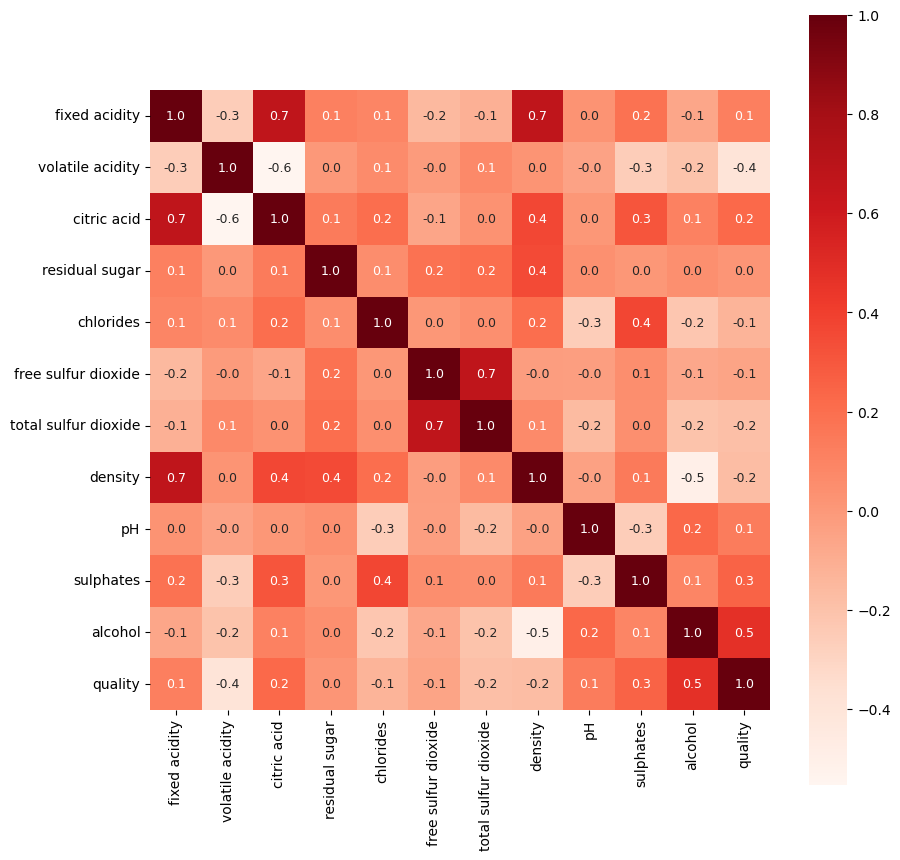

In [154]:
a = plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':9},
           cmap = 'Reds')

In [155]:
#To check the number of counts of each quality datapoint
wine['quality'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

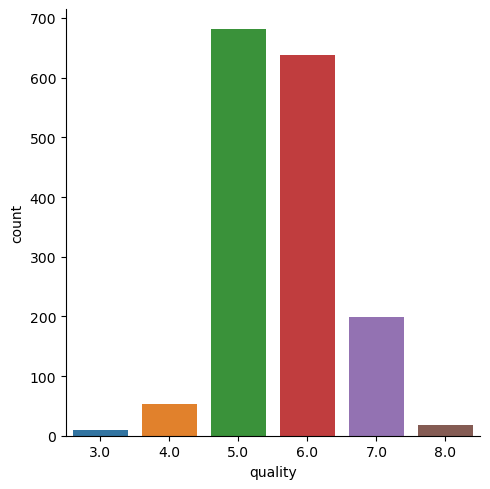

In [156]:
sns.catplot(x ='quality', data = wine, kind = 'count')

In the above plot we can view that the number of counts in quality 5 is more than the rest of the quality values.

We can check all the features in the dataset against quality, to know which feature affects the quality more in the dataset.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

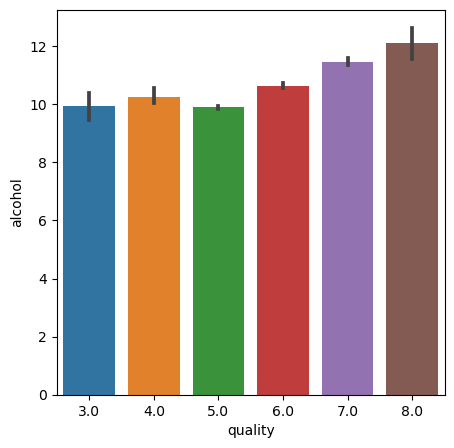

In [157]:
#Alcohol versus quality
plot1 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'alcohol', data = wine)

The above plot shows that Alcohol and quality are positively correlated.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

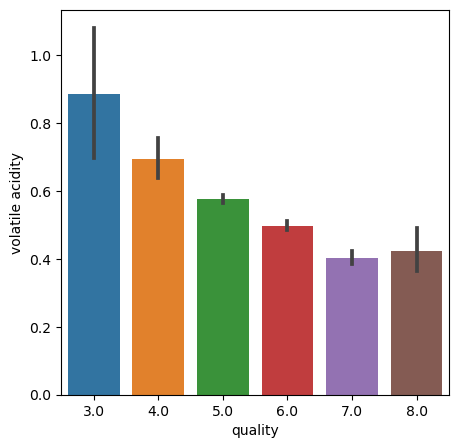

In [158]:
#Volatile acidity versus quality
plot2 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'volatile acidity', data = wine)


The above plot shows that Volatile acidity and quality are negatively correlated.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

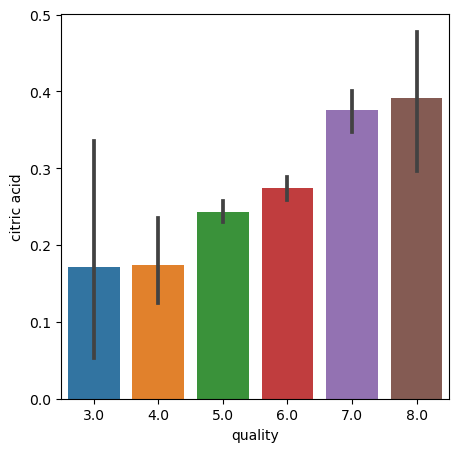

In [159]:
#Citric acid versus quality
plot3 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

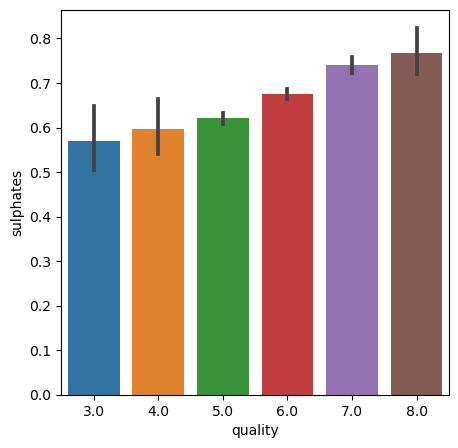

In [160]:
#Sulphates versus quality
plot4 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

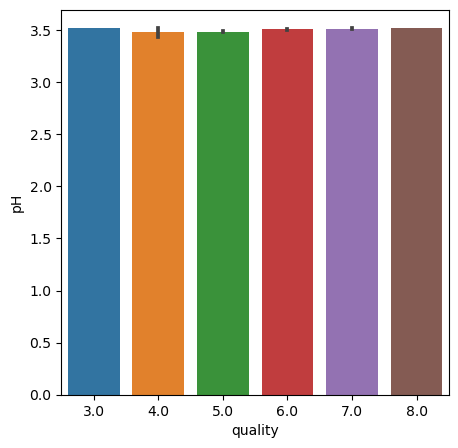

In [161]:
#pH versus quality
plot5 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'pH', data = wine)

The above plot doesn't show any correlation. <br>
pH doesn't affect the quality values.

<AxesSubplot:xlabel='quality', ylabel='density'>

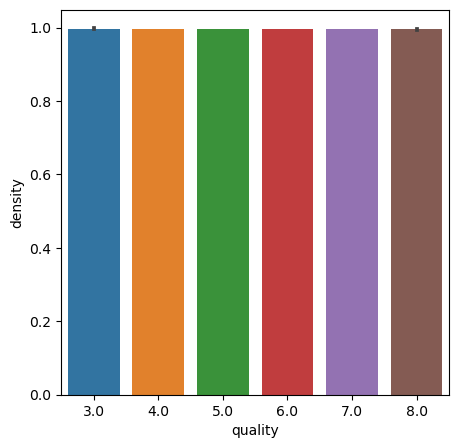

In [162]:
#Density versus quality
plot6 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'density', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

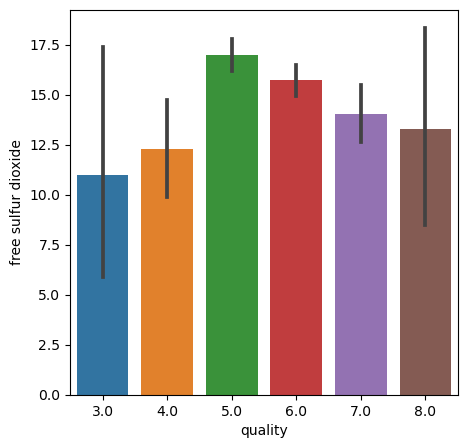

In [163]:
#free sulfur dioxide versus quality
plot7 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

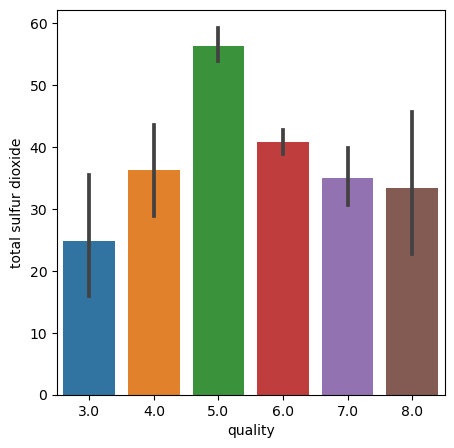

In [164]:
#Total sulfur dioxide versus quality
plot8 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

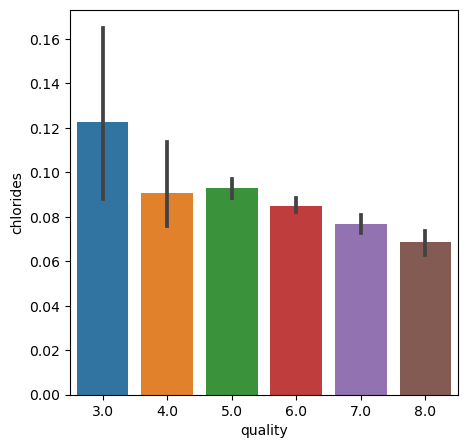

In [165]:
#Chlorides versus quality
plot9 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

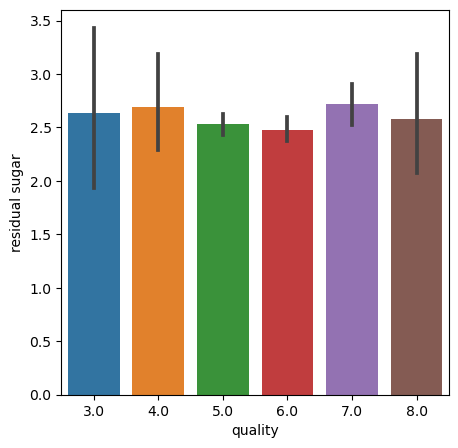

In [166]:
#residual sugar versus quality
plot10 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

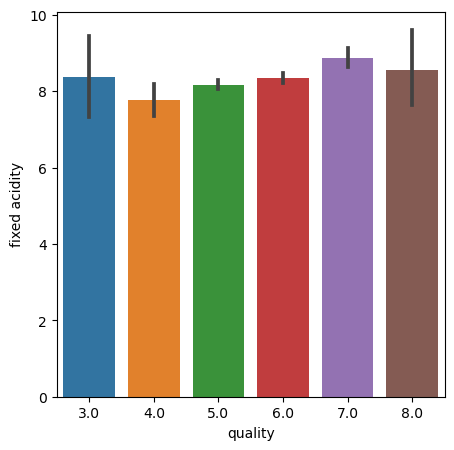

In [167]:
#fixed acidity versus quality
plot11 = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'fixed acidity', data = wine)

### Data Preprocessing

Now, in order to split the data into training and testing dataset, initially we need to separate the quality feature from the given dataset.

In [168]:
#Separating the quality column using the drop function
X = wine.drop('quality', axis = 1)

In [169]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


### Label Binarization
The process of transforming data features of any entity into vectors of binary numbers.

In this case, the quality feature contain discrete set of values, so we will be grouping the quality values in binary form i.e. 1 or 0. If the quality feature contain values equal to greater than 7 then the values will be assigned as 1 or else 0

In [170]:
Y = wine['quality'].apply(lambda y_value : 1 if y_value>=7 else 0)

In [171]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### Model Training

In [172]:
#Splitting Train and Test Dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [173]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [174]:
#Using randomforest machine learning model
randomforest = RandomForestClassifier()

In [175]:
randomforest.fit(X_train, Y_train)

RandomForestClassifier()

### Model Evaluation

In [176]:
Y_test_predict = randomforest.predict(X_test)
accuracy = accuracy_score(Y_test_predict, Y_test)

In [177]:
#Accuracy of the model
accuracy

0.934375

The Random Forest Classifier model can predict 93.4% of the predicted test data when compared it with the actual test dataset.

### Building a Predictive System

In [178]:
data = (7.8,0.57,0.09,2.3,0.065,34,45,0.99417,3.52,0.74,12.7) #Example

data_as_numpy_array = np.asarray(data).reshape(1,-1)

predict_data = randomforest.predict(data_as_numpy_array)
print(predict_data)

if (predict_data[0] == 1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The above system can predict the quality of wine depending on the input data.

### Conclusion

We studied how various features affected the quality of the wine using Data Visualization packages.

Also, we split the dataset into Train and Test Dataset to feed data to Random Forest Machine Learning Model.

By using, the accuracy score function, our respective machine learning model was able to predict 93.4% of the predicted test data set. 

Finally, we build a predictive system to predict the quality of wine, by providing some input data through Random Forest Model. Hence, the predicted result was accurate when compared with the given dataset.